# Hands on Modeling Rare Events in Time Series, with Python

## Raw Data Display

In [1]:
from data import Data
data = Data()
data.raw_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


## Picking a specific city: 
This is the code to select a specific city in the columns. 

In [2]:
data.isolate_city(city = 'New York')
processed_data = data.clean_and_preprocess()

In [3]:
processed_data.head()

,y,datetime,date,month,year
1,288.220000,2012-10-01 13:00:00,2012-10-01,10,2012
2,288.247676,2012-10-01 14:00:00,2012-10-01,10,2012
3,288.326940,2012-10-01 15:00:00,2012-10-01,10,2012
4,288.406203,2012-10-01 16:00:00,2012-10-01,10,2012
5,288.485467,2012-10-01 17:00:00,2012-10-01,10,2012


## Distribution of rare events:

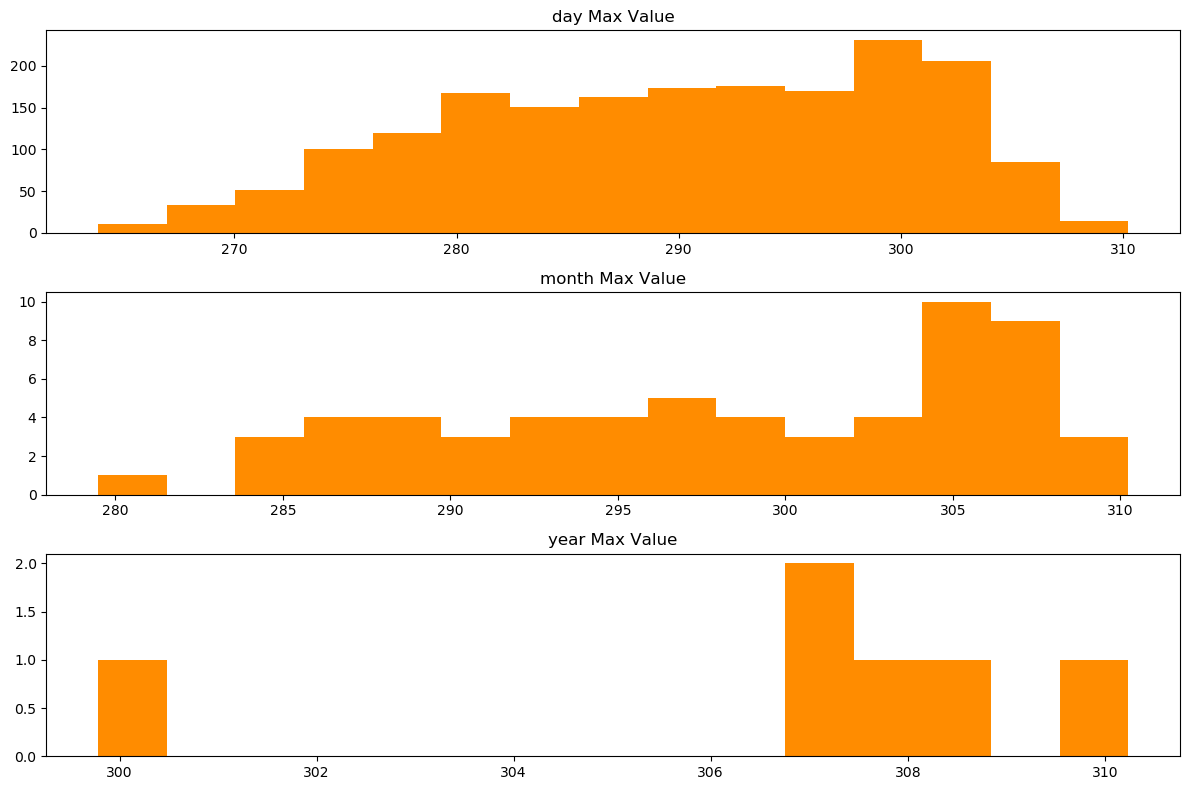

In [4]:
from rare_events_processor import RareEventsToolbox
rare_events_toolbox = RareEventsToolbox(data = processed_data)
max_values_result = rare_events_toolbox.extract_max_values()
rare_events_toolbox.plot_distributions()

In [5]:
rare_events_toolbox.fit_all_distributions()
best_dist, ranked_scores = rare_events_toolbox.rank_distributions(key = 'day', rank_based_on = 'bic')
ranked_scores

,log_likelihood,aic,bic
weibull,-6870.265288,13746.530576,13763.105879
gumbel,-6890.107145,13784.214290,13795.264491
gev,-9908.608974,19823.217949,19839.793251


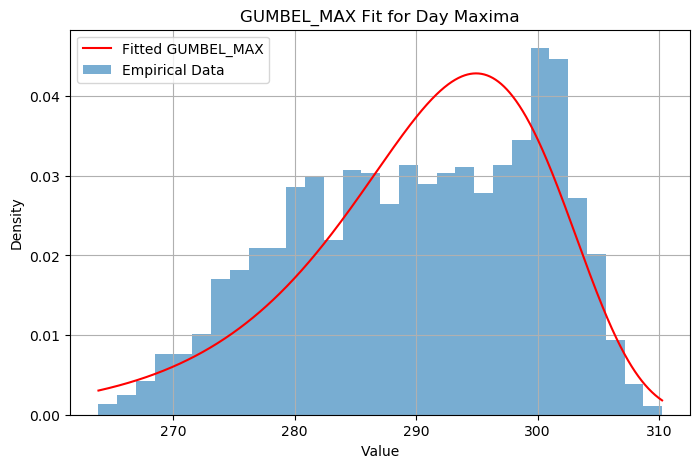

In [6]:
rare_events_toolbox.plot_fitted_distribution(key = 'day', dist_type = best_dist)

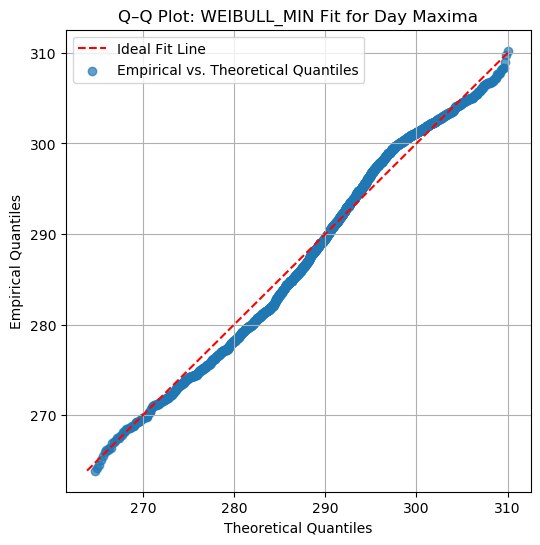

In [7]:
rare_events_toolbox.plot_qq(key = 'day', dist_type = best_dist)